 Use Case Overview: Waze User Churn Prediction
1. Business Goal & Objectives
Goal: To increase the overall growth of Waze by preventing monthly user churn on the Waze application

Objectives:

Developing a churn prediction model will help prevent churn, improve user retention, and grow Waze’s business.
Analyze and interpret data, generate actionable insights, and help leadership make informed business decisions.
Empower the Waze leadership to make data-driven decision making by offering key insights and data-informed recommendations.
Proactively identify factors that will engage high-risk churn users to retain them.

Business Rules:

- Churn is the business term that describes how many customers stop using a product or service, or stop doing business with a company altogether and at what rate this occurs.
- User churn is measured by the number of users who have either uninstalled the app or stopped using the app.

Summary:

If Waze can identify a segment of users who are at high risk of churning, Waze can proactively engage these users with special offers to try and retain them. Otherwise, Waze may lose these users without knowing why.
 nsights will help Waze leadership optimize the company’s retention strategy, enhance user experience, and make data-driven decisions about product development.

Typically, high retention rates indicate satisfied users who repeatedly use the Waze app over time. Developing a churn prediction model will help prevent churn, improve user retention, and grow Waze’s business. An accurate model can also help identify specific factors that contribute to churn and answer questions such as:

- WHO are the users most likely to churn?
- WHY do users churn?
- WHEN do users churn?

2. ML/Data Science Goal & Objectives
Goal: To develop machine learning models that predict user churn on the Waze application

Objectives:

- Identify missing values, duplicated data, and outliers and process them
Visualize data by creating bar chart, histogram, and box plots
- Determine the correct modeling approach

Transform data via:
- Imputation (e.g. reassign outlier values with median, encode character values to numerical values
- Feature Engineering techniques to prepare data for model building
- Feature selection
- Feature transformation
- Feature extraction

Improve model performance

- Via Hyperparameter-Tuning
- Use Grid Search to find the optimal combination of hyperparameters
- Build models that predict Waze user churn

Regression Techniques

- M1: Binomial Regression Model
Check model assumptions before and after building the model
Hypothesis Testing
- M2: Naive Bayes Model
- Tree-Based Models
- M3: Random Forest
- M4: Extreme Gradient Boosting (XGBoost)

Evalute the quality of model predictions via metrics and data visualization

1. Recall
2. F1-score
3. Confusion Matrix


# 1. Understand Dataset

Goal: Import data

#### Tasks:
- Import packages and libraries
- Create a dataframe to load data
- Inspect data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB,ComplementNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay,roc_curve,auc,RocCurveDisplay
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

### Understand dataset

In [ ]:
df = pd.read_csv('/content/waze_dataset.csv')

In [ ]:
df.head()

ID     label  sessions  drives  total_sessions  n_days_after_onboarding  \
0   0  retained       283     226      296.748273                     2276   
1   1  retained       133     107      326.896596                     1225   
2   2  retained       114      95      135.522926                     2651   
3   3  retained        49      40       67.589221                       15   
4   4  retained        84      68      168.247020                     1562   

   total_navigations_fav1  total_navigations_fav2  driven_km_drives  \
0                     208                       0       2628.845068   
1                      19                      64      13715.920550   
2                       0                       0       3059.148818   
3                     322                       7        913.591123   
4                     166                       5       3950.202008   

   duration_minutes_drives  activity_days  driving_days   device  
0              1985.775061             28            19  Android  
1              3160.472914             13            11   iPhone  
2              1610.735904             14             8  Android  
3               587.196542              7             3   iPhone  
4              1219.555924             27            18  Android

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [ ]:
df.shape

(14999, 13)

In [ ]:
df.dtypes.sort_values(ascending=False)

label                       object
device                      object
total_sessions             float64
driven_km_drives           float64
duration_minutes_drives    float64
ID                           int64
sessions                     int64
drives                       int64
n_days_after_onboarding      int64
total_navigations_fav1       int64
total_navigations_fav2       int64
activity_days                int64
driving_days                 int64
dtype: object

key observations:

The DataFrame has:

- 2 columns with Dtype: object
- 3 columns with Dtype: float64
- 8 columns with Dtype: int64

Total of 14,999 rows and 13 columns in the dataframe.

## EDA via Descriptive Statistics

#### Tasks:

Visualize probability distribution of key variables
- 'driven_km_drives'
- 'drives'
- 'driving_days'

Generate descriptive statistics
- mean
- median
- standard deviation

Compare the distributtion against the Empirical Rule

Find outliers using Z-score

In [ ]:
df.describe()

ID      sessions        drives  total_sessions  \
count  14999.000000  14999.000000  14999.000000    14999.000000   
mean    7499.000000     80.633776     67.281152      189.964447   
std     4329.982679     80.699065     65.913872      136.405128   
min        0.000000      0.000000      0.000000        0.220211   
25%     3749.500000     23.000000     20.000000       90.661156   
50%     7499.000000     56.000000     48.000000      159.568115   
75%    11248.500000    112.000000     93.000000      254.192341   
max    14998.000000    743.000000    596.000000     1216.154633   

       n_days_after_onboarding  total_navigations_fav1  \
count             14999.000000            14999.000000   
mean               1749.837789              121.605974   
std                1008.513876              148.121544   
min                   4.000000                0.000000   
25%                 878.000000                9.000000   
50%                1741.000000               71.000000   
75%                2623.500000              178.000000   
max                3500.000000             1236.000000   

       total_navigations_fav2  driven_km_drives  duration_minutes_drives  \
count            14999.000000      14999.000000             14999.000000   
mean                29.672512       4039.340921              1860.976012   
std                 45.394651       2502.149334              1446.702288   
min                  0.000000         60.441250                18.282082   
25%                  0.000000       2212.600607               835.996260   
50%                  9.000000       3493.858085              1478.249859   
75%                 43.000000       5289.861262              2464.362632   
max                415.000000      21183.401890             15851.727160   

       activity_days  driving_days  
count   14999.000000  14999.000000  
mean       15.537102     12.179879  
std         9.004655      7.824036  
min         0.000000      0.000000  
25%         8.000000      5.000000  
50%        16.000000     12.000000  
75%        23.000000     19.000000  
max        31.000000     30.000000

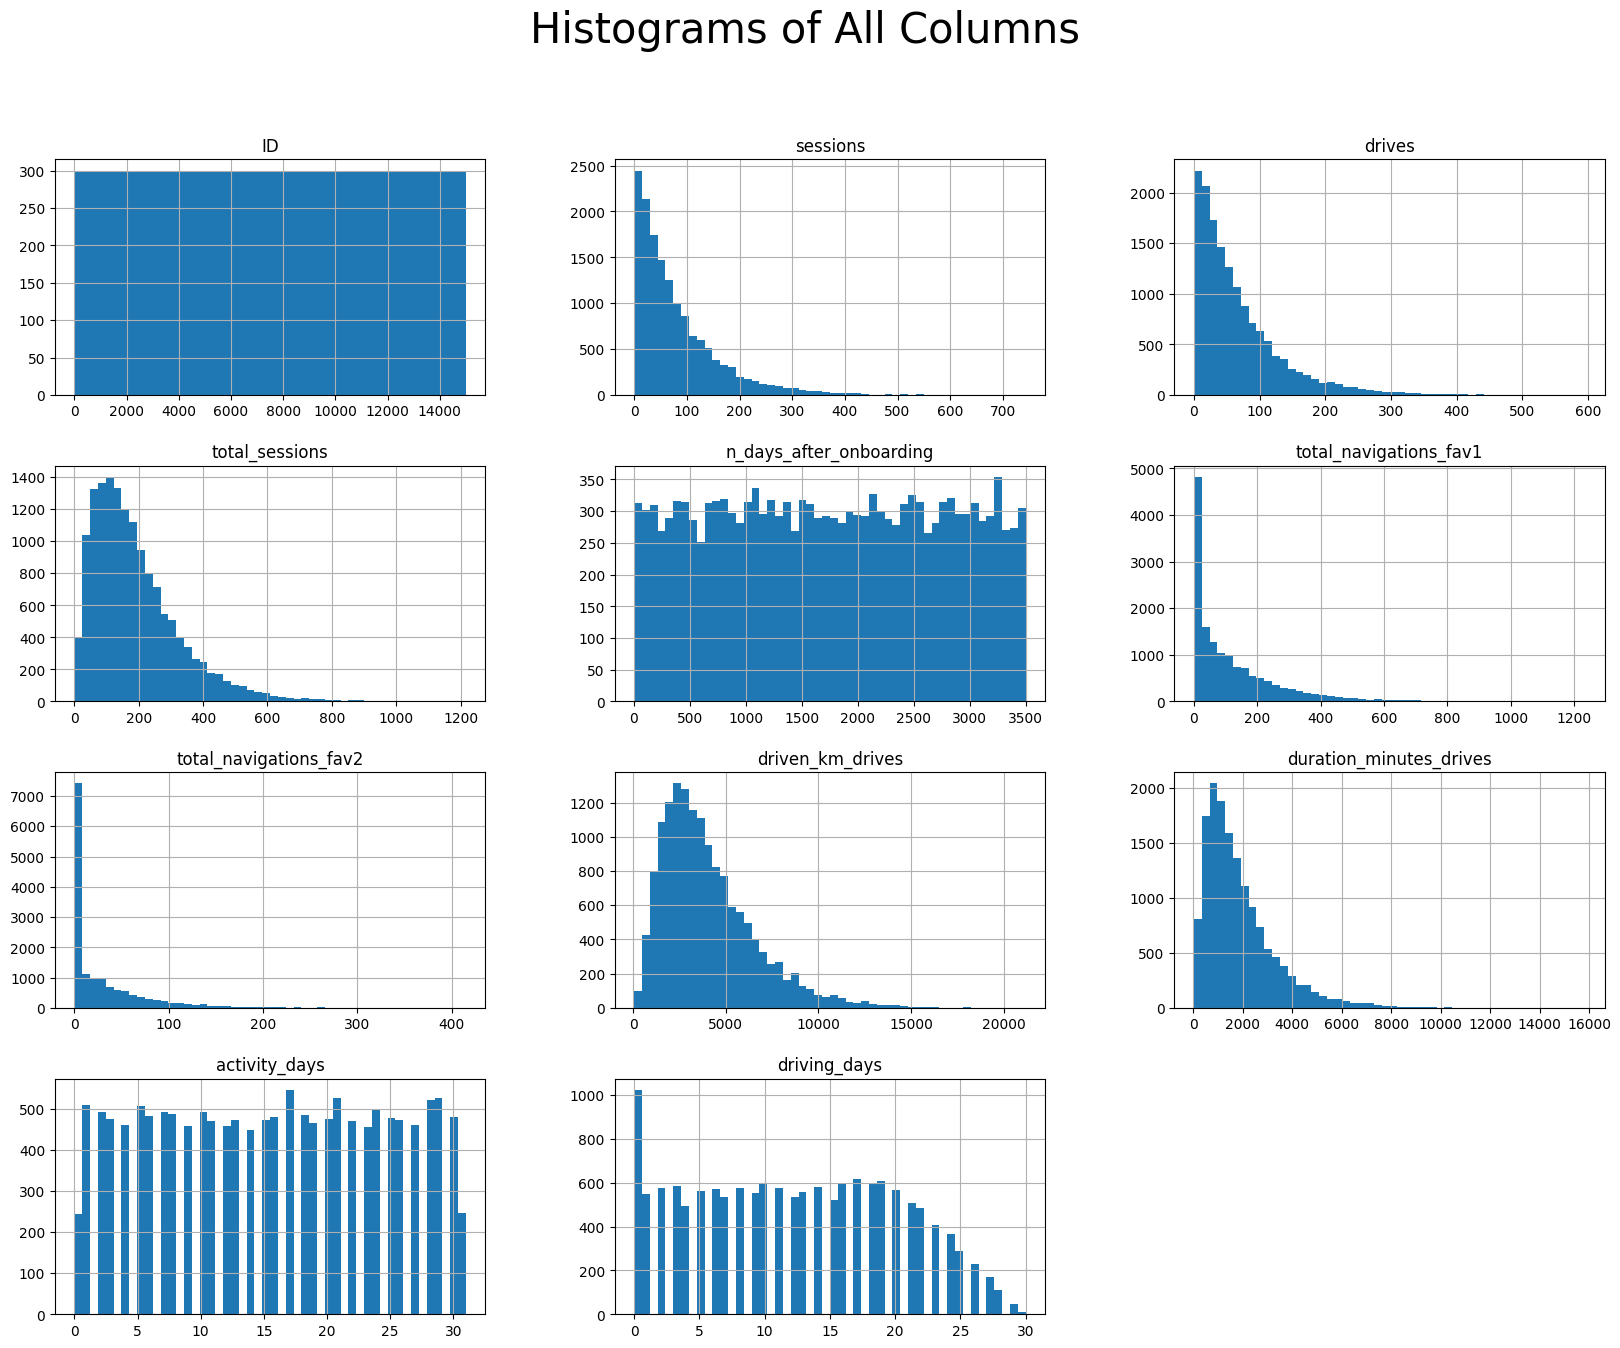

In [ ]:
# Plot histograms for each column
df.hist(figsize=(20, 15), bins=50)
plt.suptitle('Histograms of All Columns', fontsize=30)
plt.show()

thier is many outliers in my datast

Identify outliers using Z-score

## Detecting outliters using z_score

In [ ]:
df_copy = df.copy()

# I will drop all object columns
df_copy.drop('device',axis=1,inplace=True)
df_copy.drop('ID',axis=1,inplace=True)
df_copy.drop('label',axis=1,inplace=True)


Percentage of Outliers for Each Column:
sessions                   1.893460
drives                     1.833456
total_sessions             1.480099
n_days_after_onboarding    0.000000
total_navigations_fav1     2.013468
total_navigations_fav2     2.120141
driven_km_drives           1.373425
duration_minutes_drives    1.813454
activity_days              0.000000
driving_days               0.000000
dtype: float64


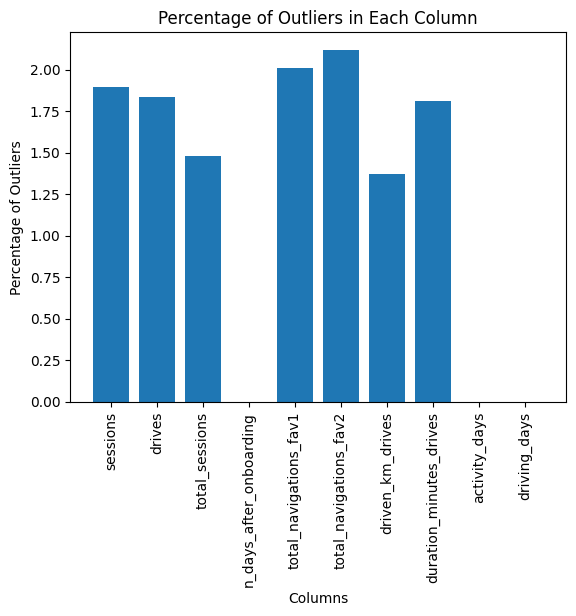

In [ ]:
# Function to calculate the percentage of outliers for each column
def calculate_outlier_percentage(column):
    z_scores = (column - column.mean()) / column.std()
    outliers = np.abs(z_scores) > 3  # Outliers based on Z-score threshold
    outlier_percentage = (outliers.sum() / len(column)) * 100
    return outlier_percentage

# Calculate the percentage of outliers for each column
outlier_percentages = df_copy.apply(calculate_outlier_percentage)

# Display the results
print("Percentage of Outliers for Each Column:")
print(outlier_percentages)

plt.bar(outlier_percentages.index, outlier_percentages.values)
plt.xlabel('Columns')
plt.ylabel('Percentage of Outliers')
plt.title('Percentage of Outliers in Each Column')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# total percent of ouliers in my dataset
total_precent_outliers = outlier_percentages.sum()
print(f'total percent of ouliers in my dataset : {total_precent_outliers} % from all dataset')

total percent of ouliers in my dataset : 12.527501833455563 % from all dataset


In [ ]:
df['label'].value_counts()

label
retained    11763
churned      2536
Name: count, dtype: int64

##  prepare data for modeling

In [ ]:
# check for duplicates
df.duplicated().sum()

0

In [ ]:
# identify and handing missing values
df.isnull().sum()

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

key observation:

- "lable" has 700 rows that have missing values
decision:

Since "label" is a y-target variable, decided to exclude those 700 rows with missing data for ML model building

In [ ]:
## drop 700 rows that have null values
df.dropna(inplace=True)
df.drop('ID',axis=1,inplace=True) # drop ID column

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.shape

(14299, 12)

In [ ]:
df['device'].describe()

count      14299
unique         2
top       iPhone
freq        9225
Name: device, dtype: object

In [ ]:
# drop device
df.drop('device',axis=1,inplace=True)

In [ ]:
# spilt data into x and y
x = df.drop('label',axis=1)
y = df['label']

In [ ]:
x.columns

Index(['sessions', 'drives', 'total_sessions', 'n_days_after_onboarding',
       'total_navigations_fav1', 'total_navigations_fav2', 'driven_km_drives',
       'duration_minutes_drives', 'activity_days', 'driving_days'],
      dtype='object')

### Handling outliers

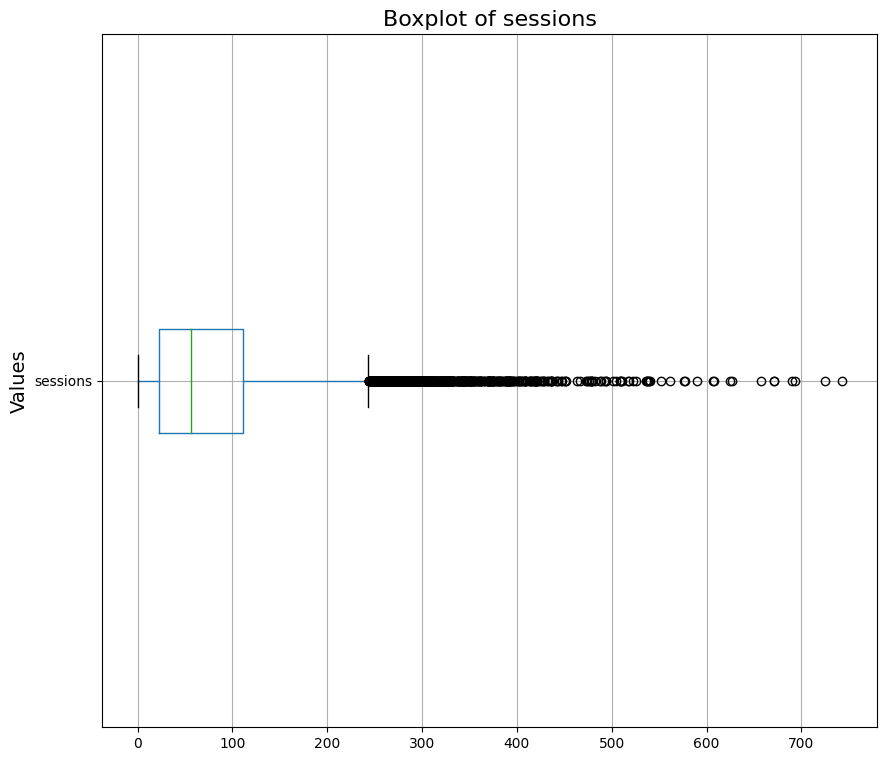

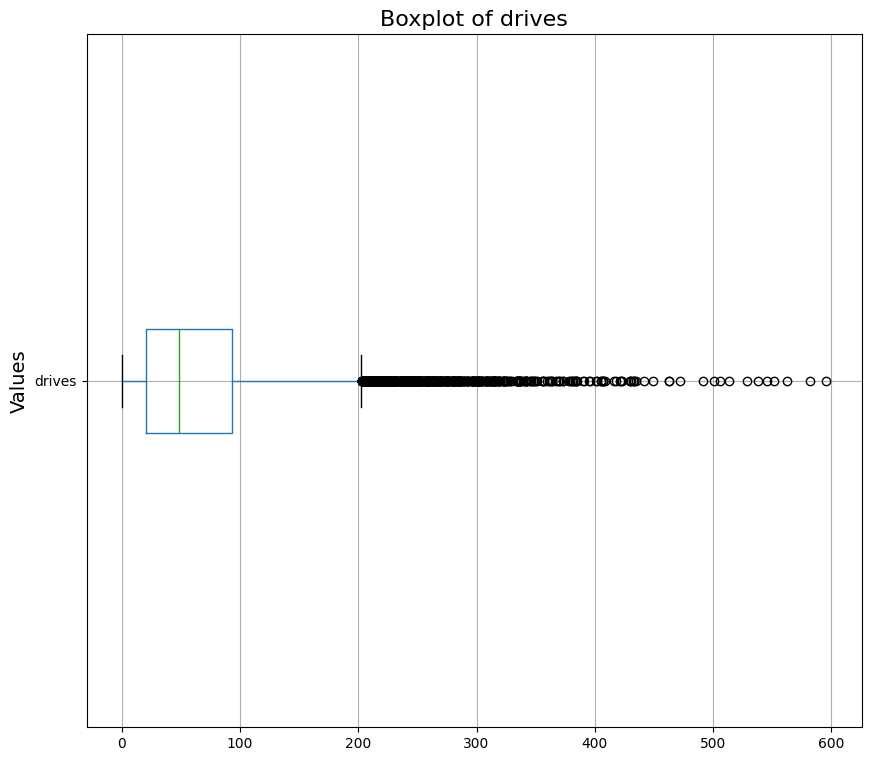

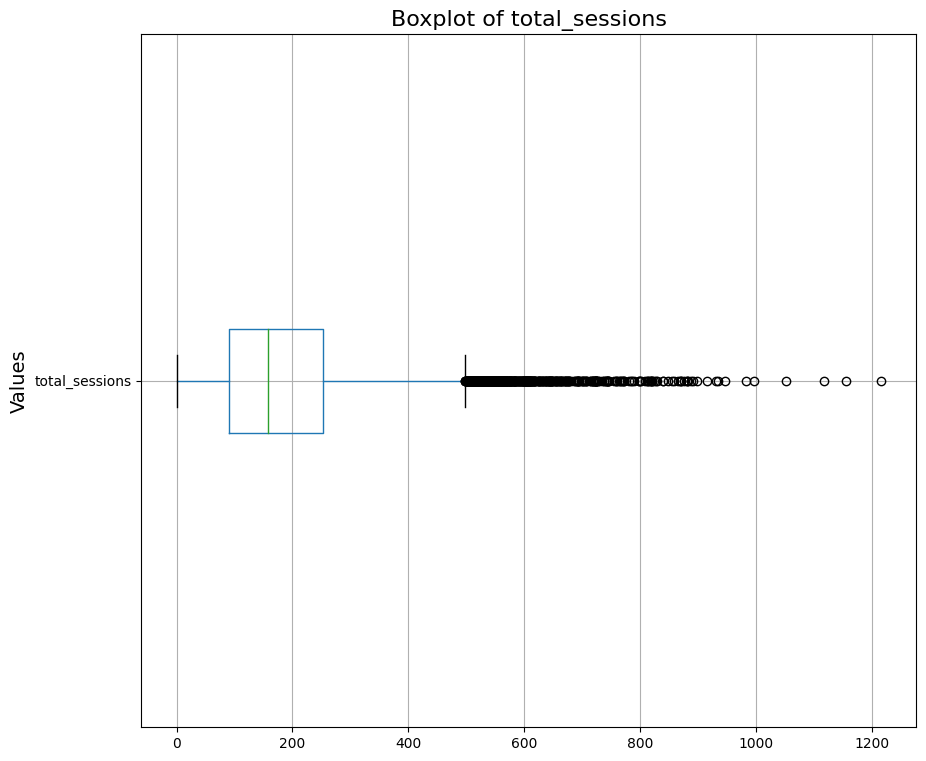

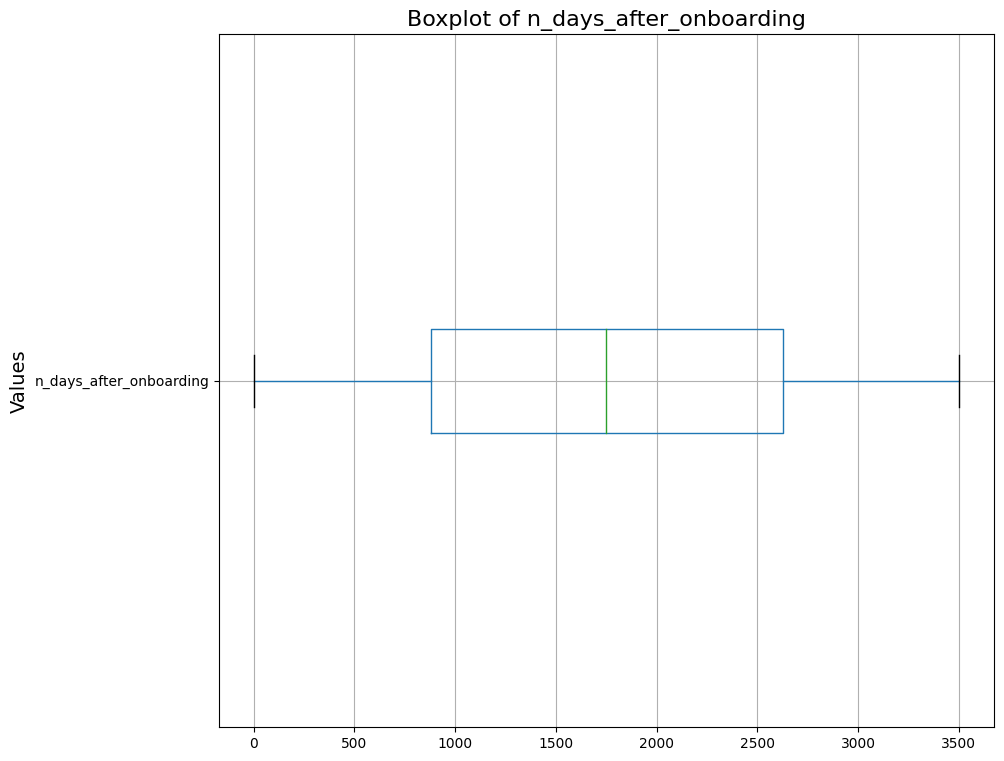

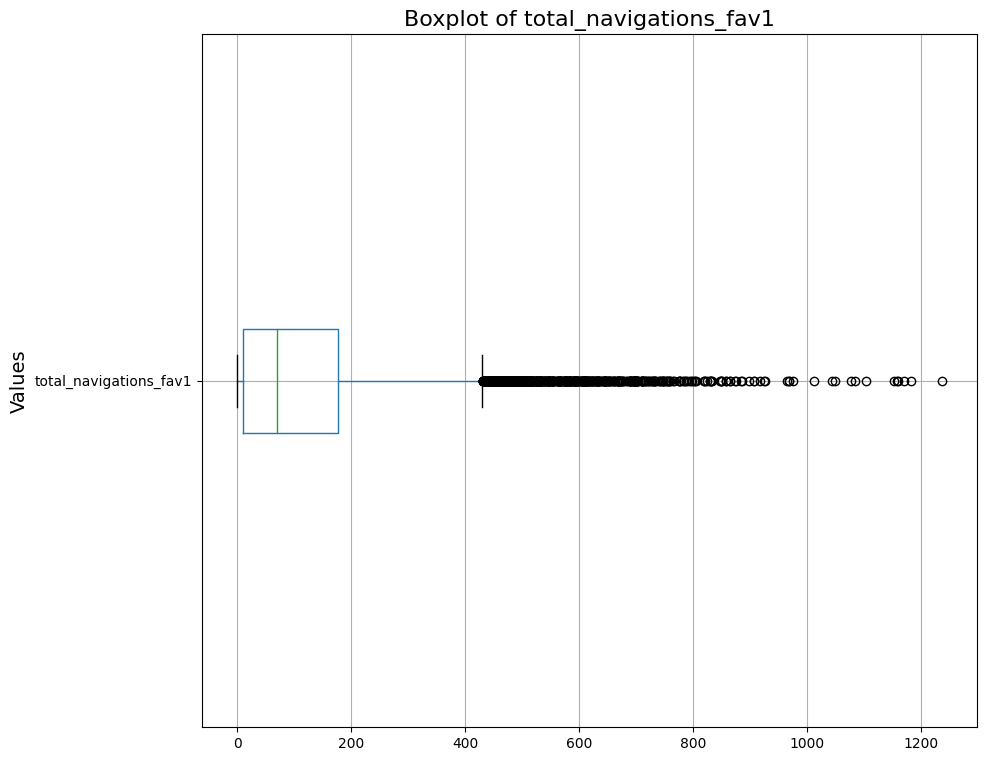

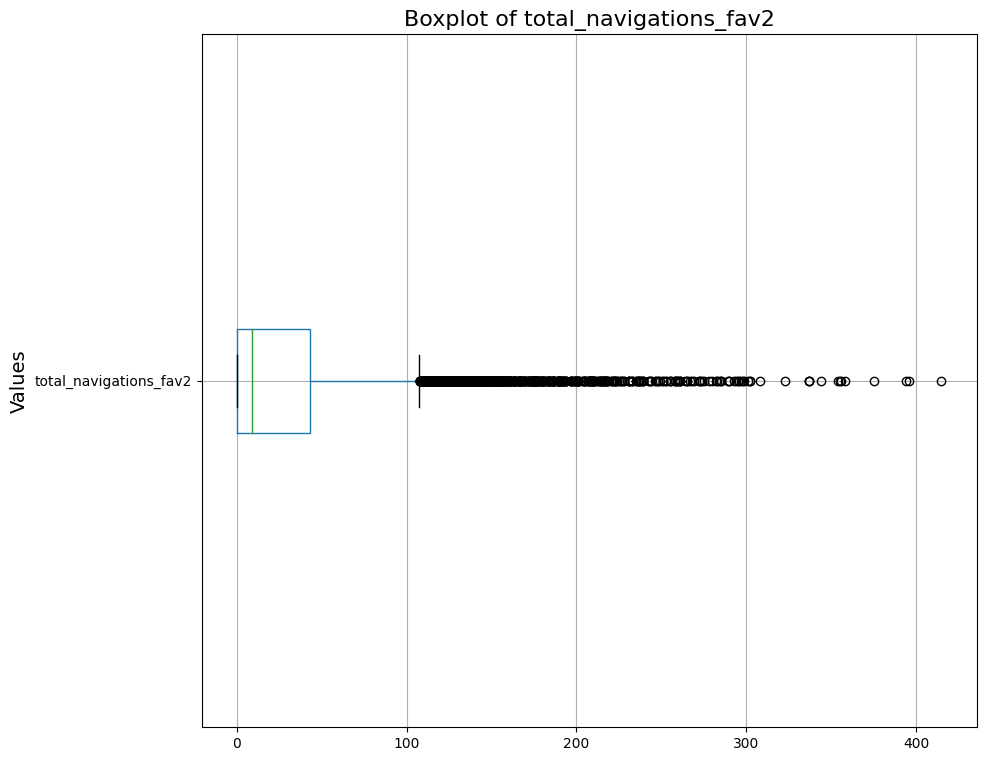

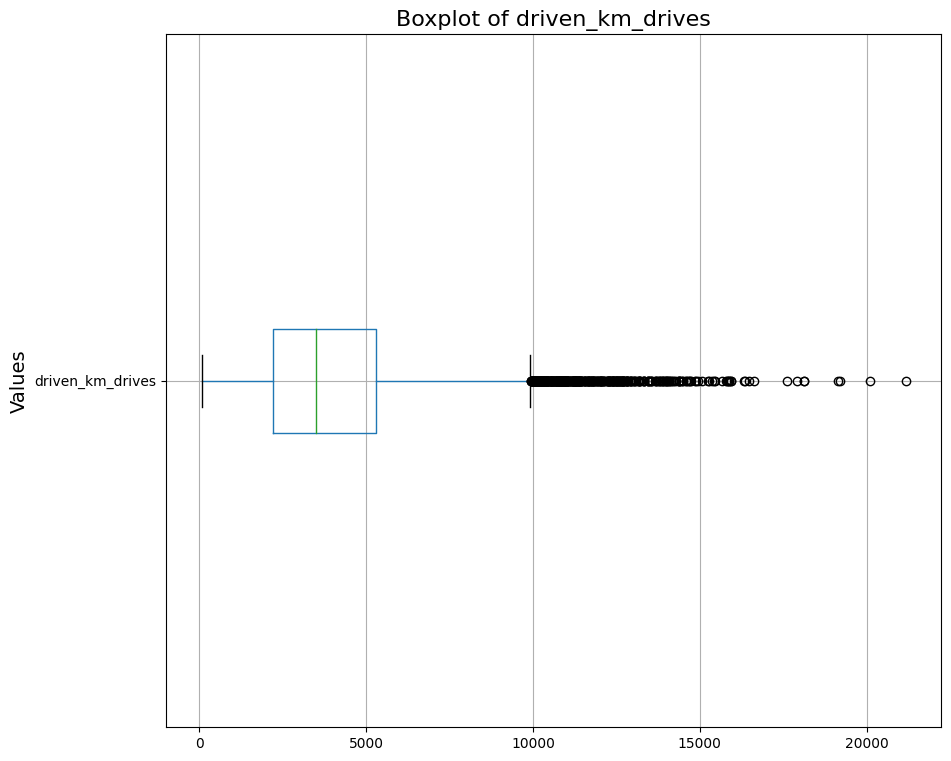

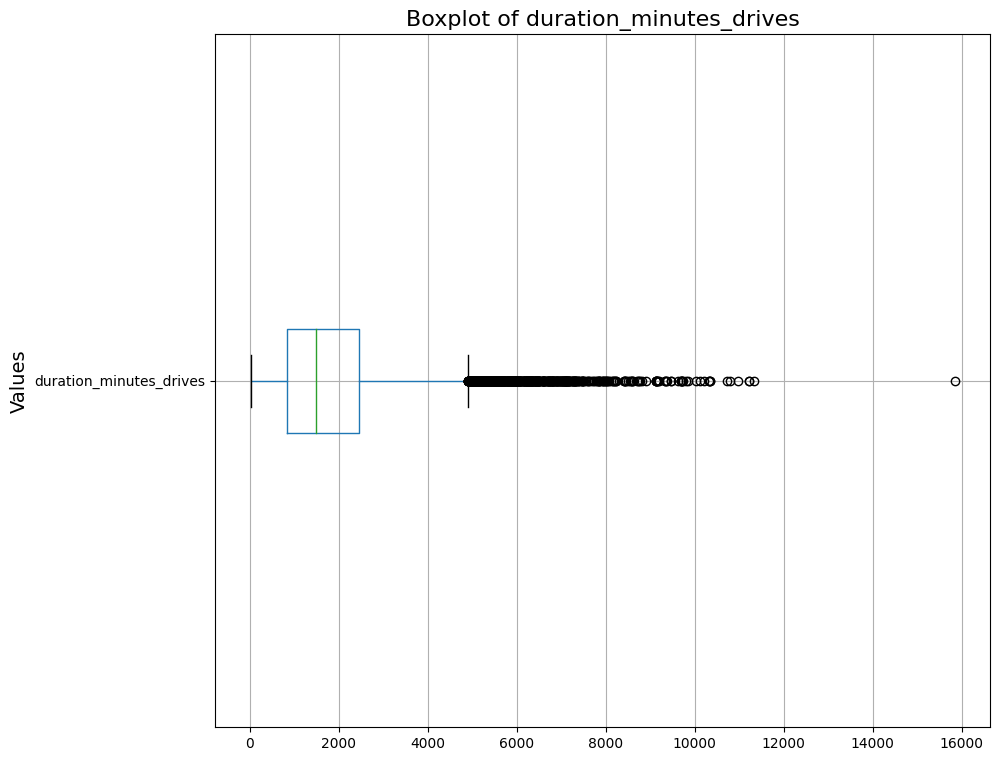

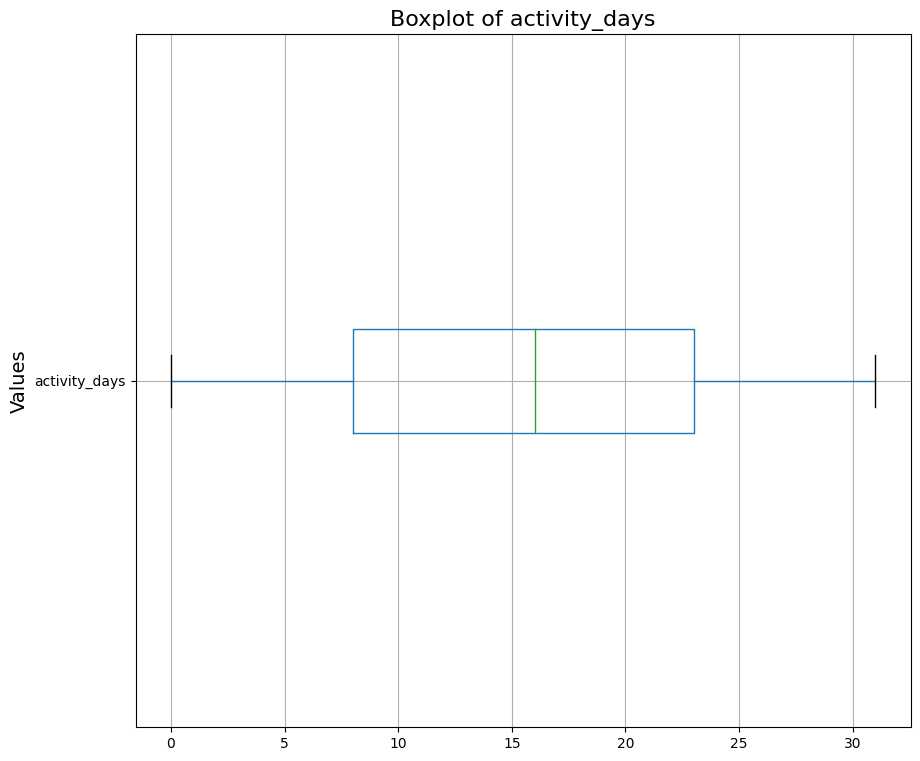

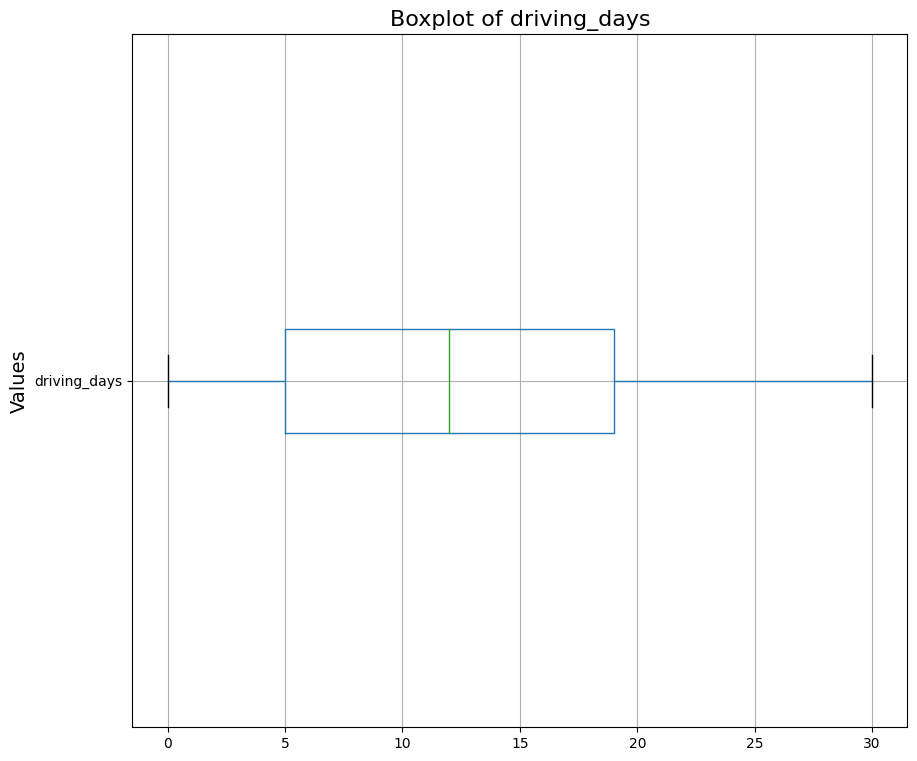

In [ ]:
# detecting outliers using boxplot
for column in x.columns:
    plt.figure(figsize=(10, 9))
    x.boxplot(column =column,vert=False)
    plt.title(f'Boxplot of {column}', fontsize=16)
    plt.ylabel('Values', fontsize=14)
    plt.show()

In [ ]:
def replace_outliers_with_median(x):
    # Iterate over each column
    for column in x.columns:
        # Calculate Q1 and Q3
        Q1 = x[column].quantile(0.25)
        Q3 = x[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with median
        median = x[column].median()
        x[column] = x[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

    return x

# Example usage
x = replace_outliers_with_median(x)


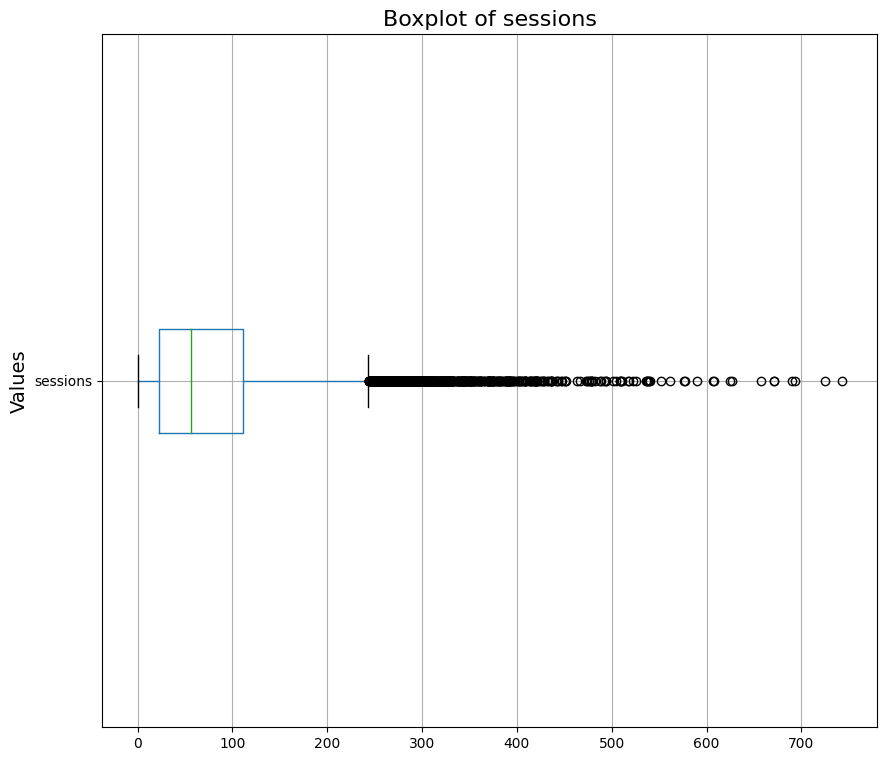

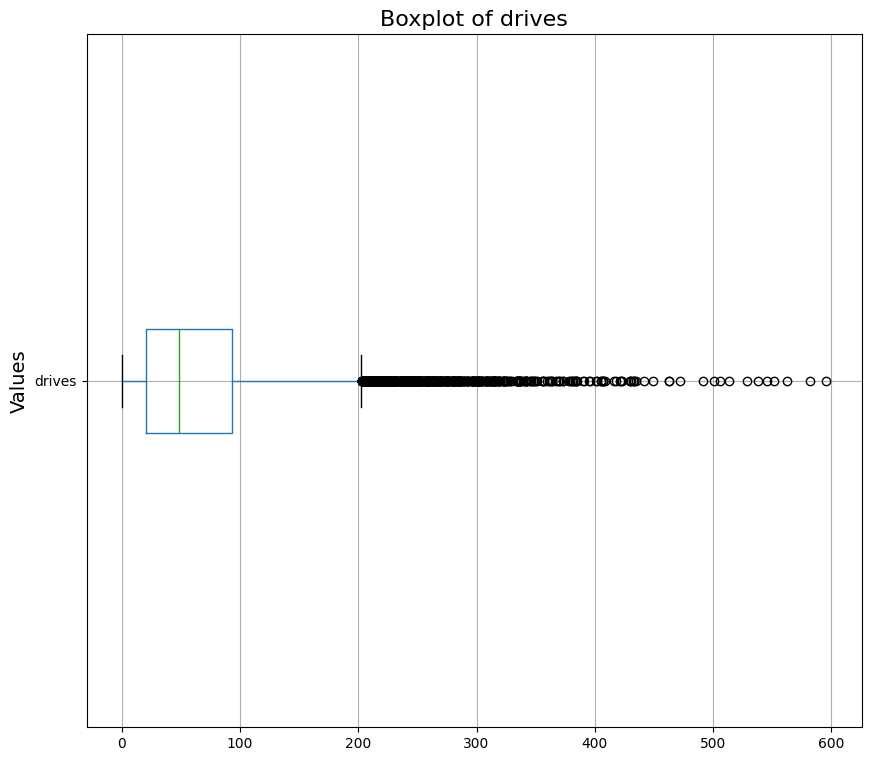

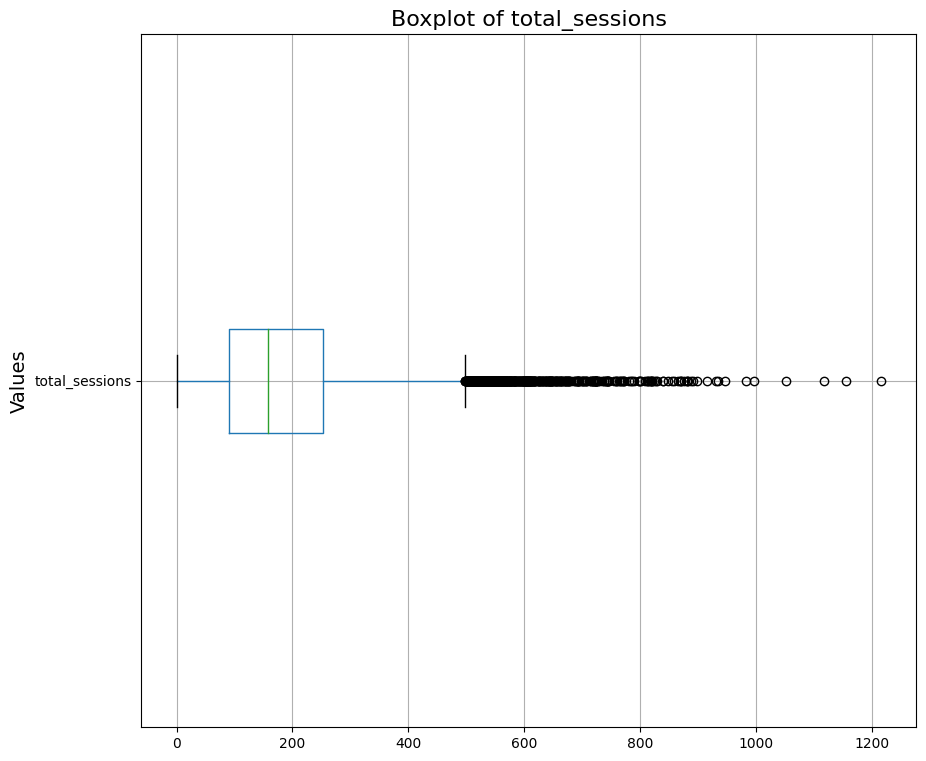

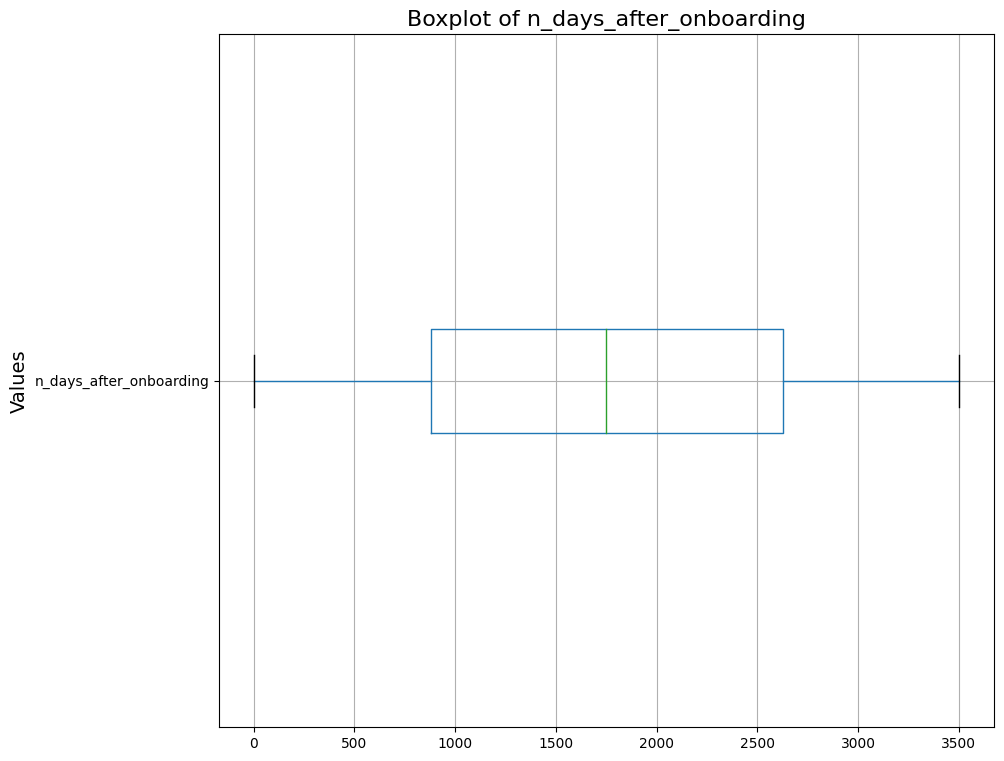

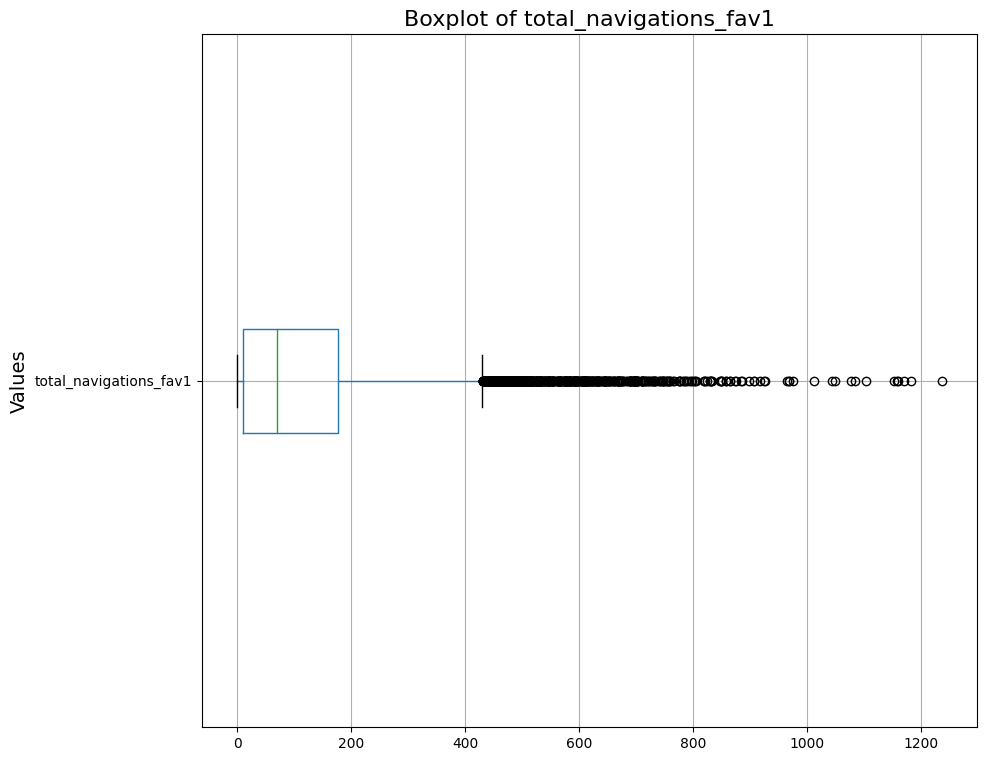

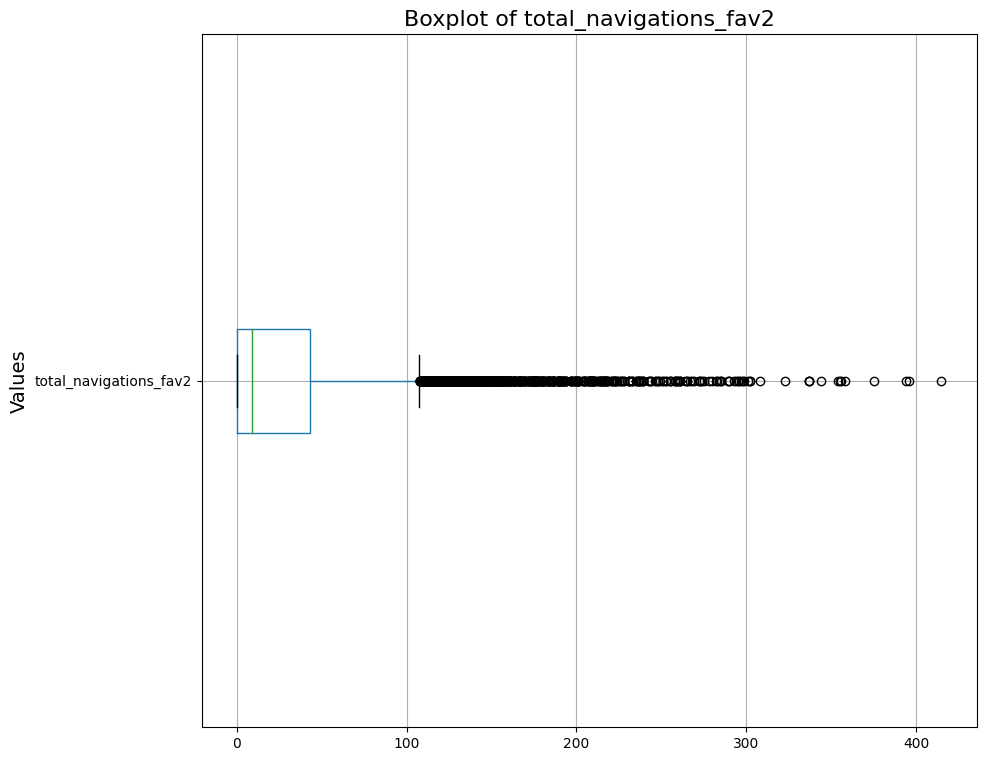

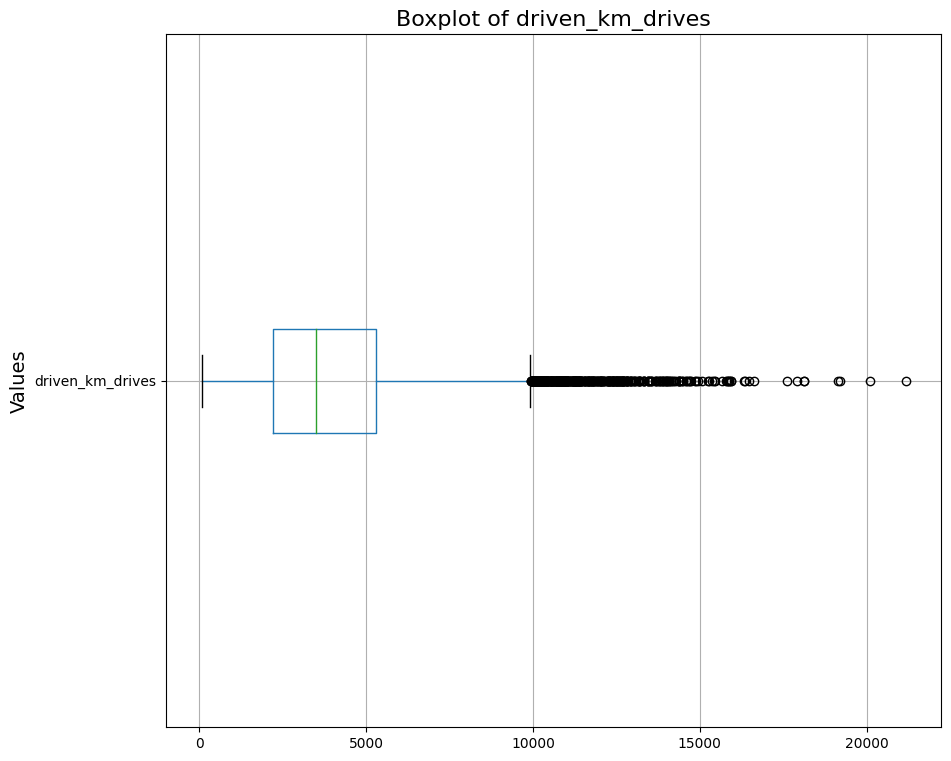

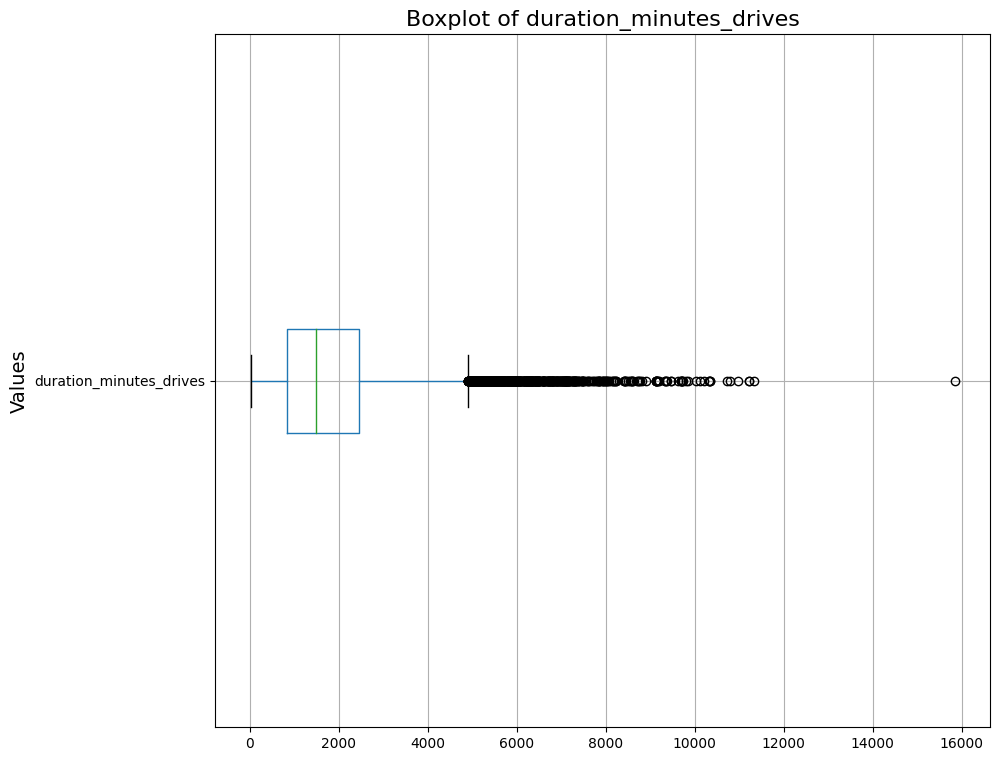

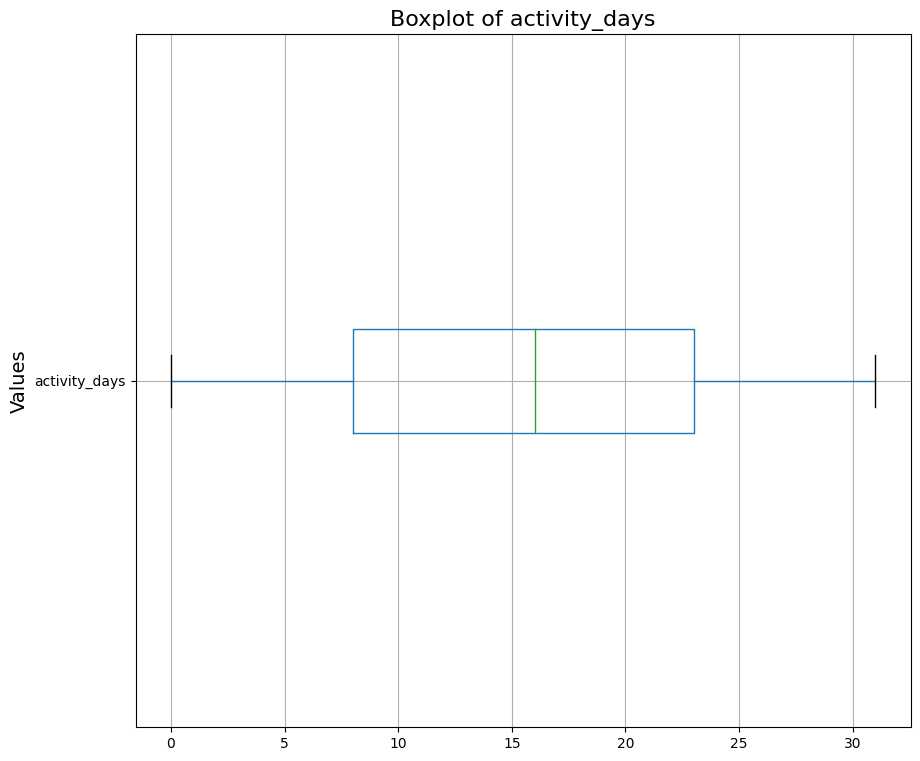

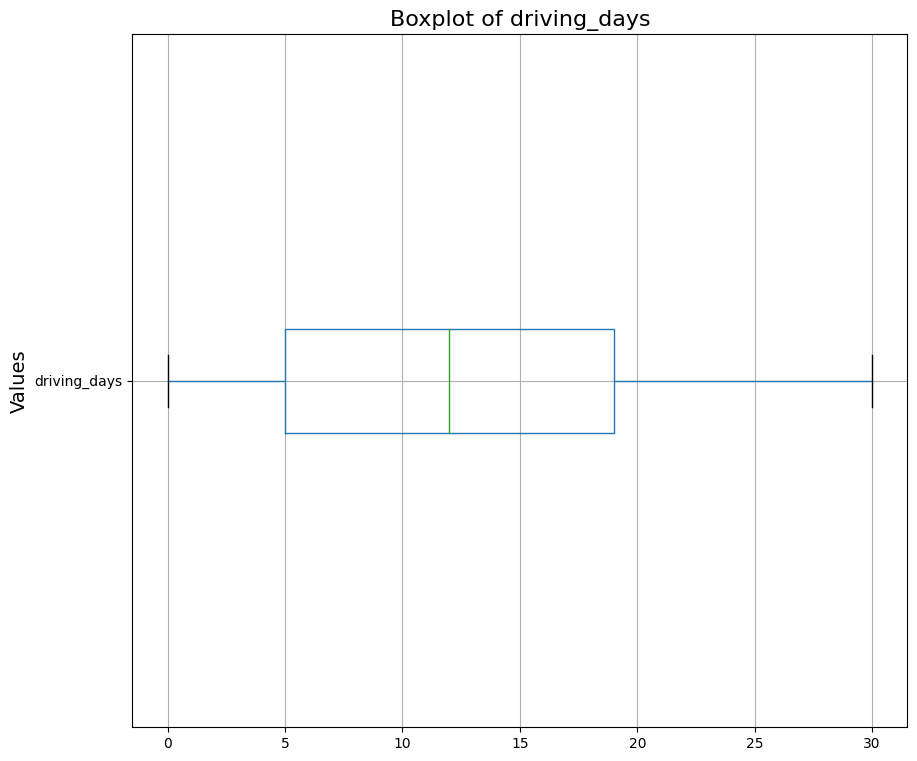

In [ ]:
for column in x.columns:
    plt.figure(figsize=(10, 9))
    x.boxplot(column =column,vert=False)
    plt.title(f'Boxplot of {column}', fontsize=16)
    plt.ylabel('Values', fontsize=14)
    plt.show()

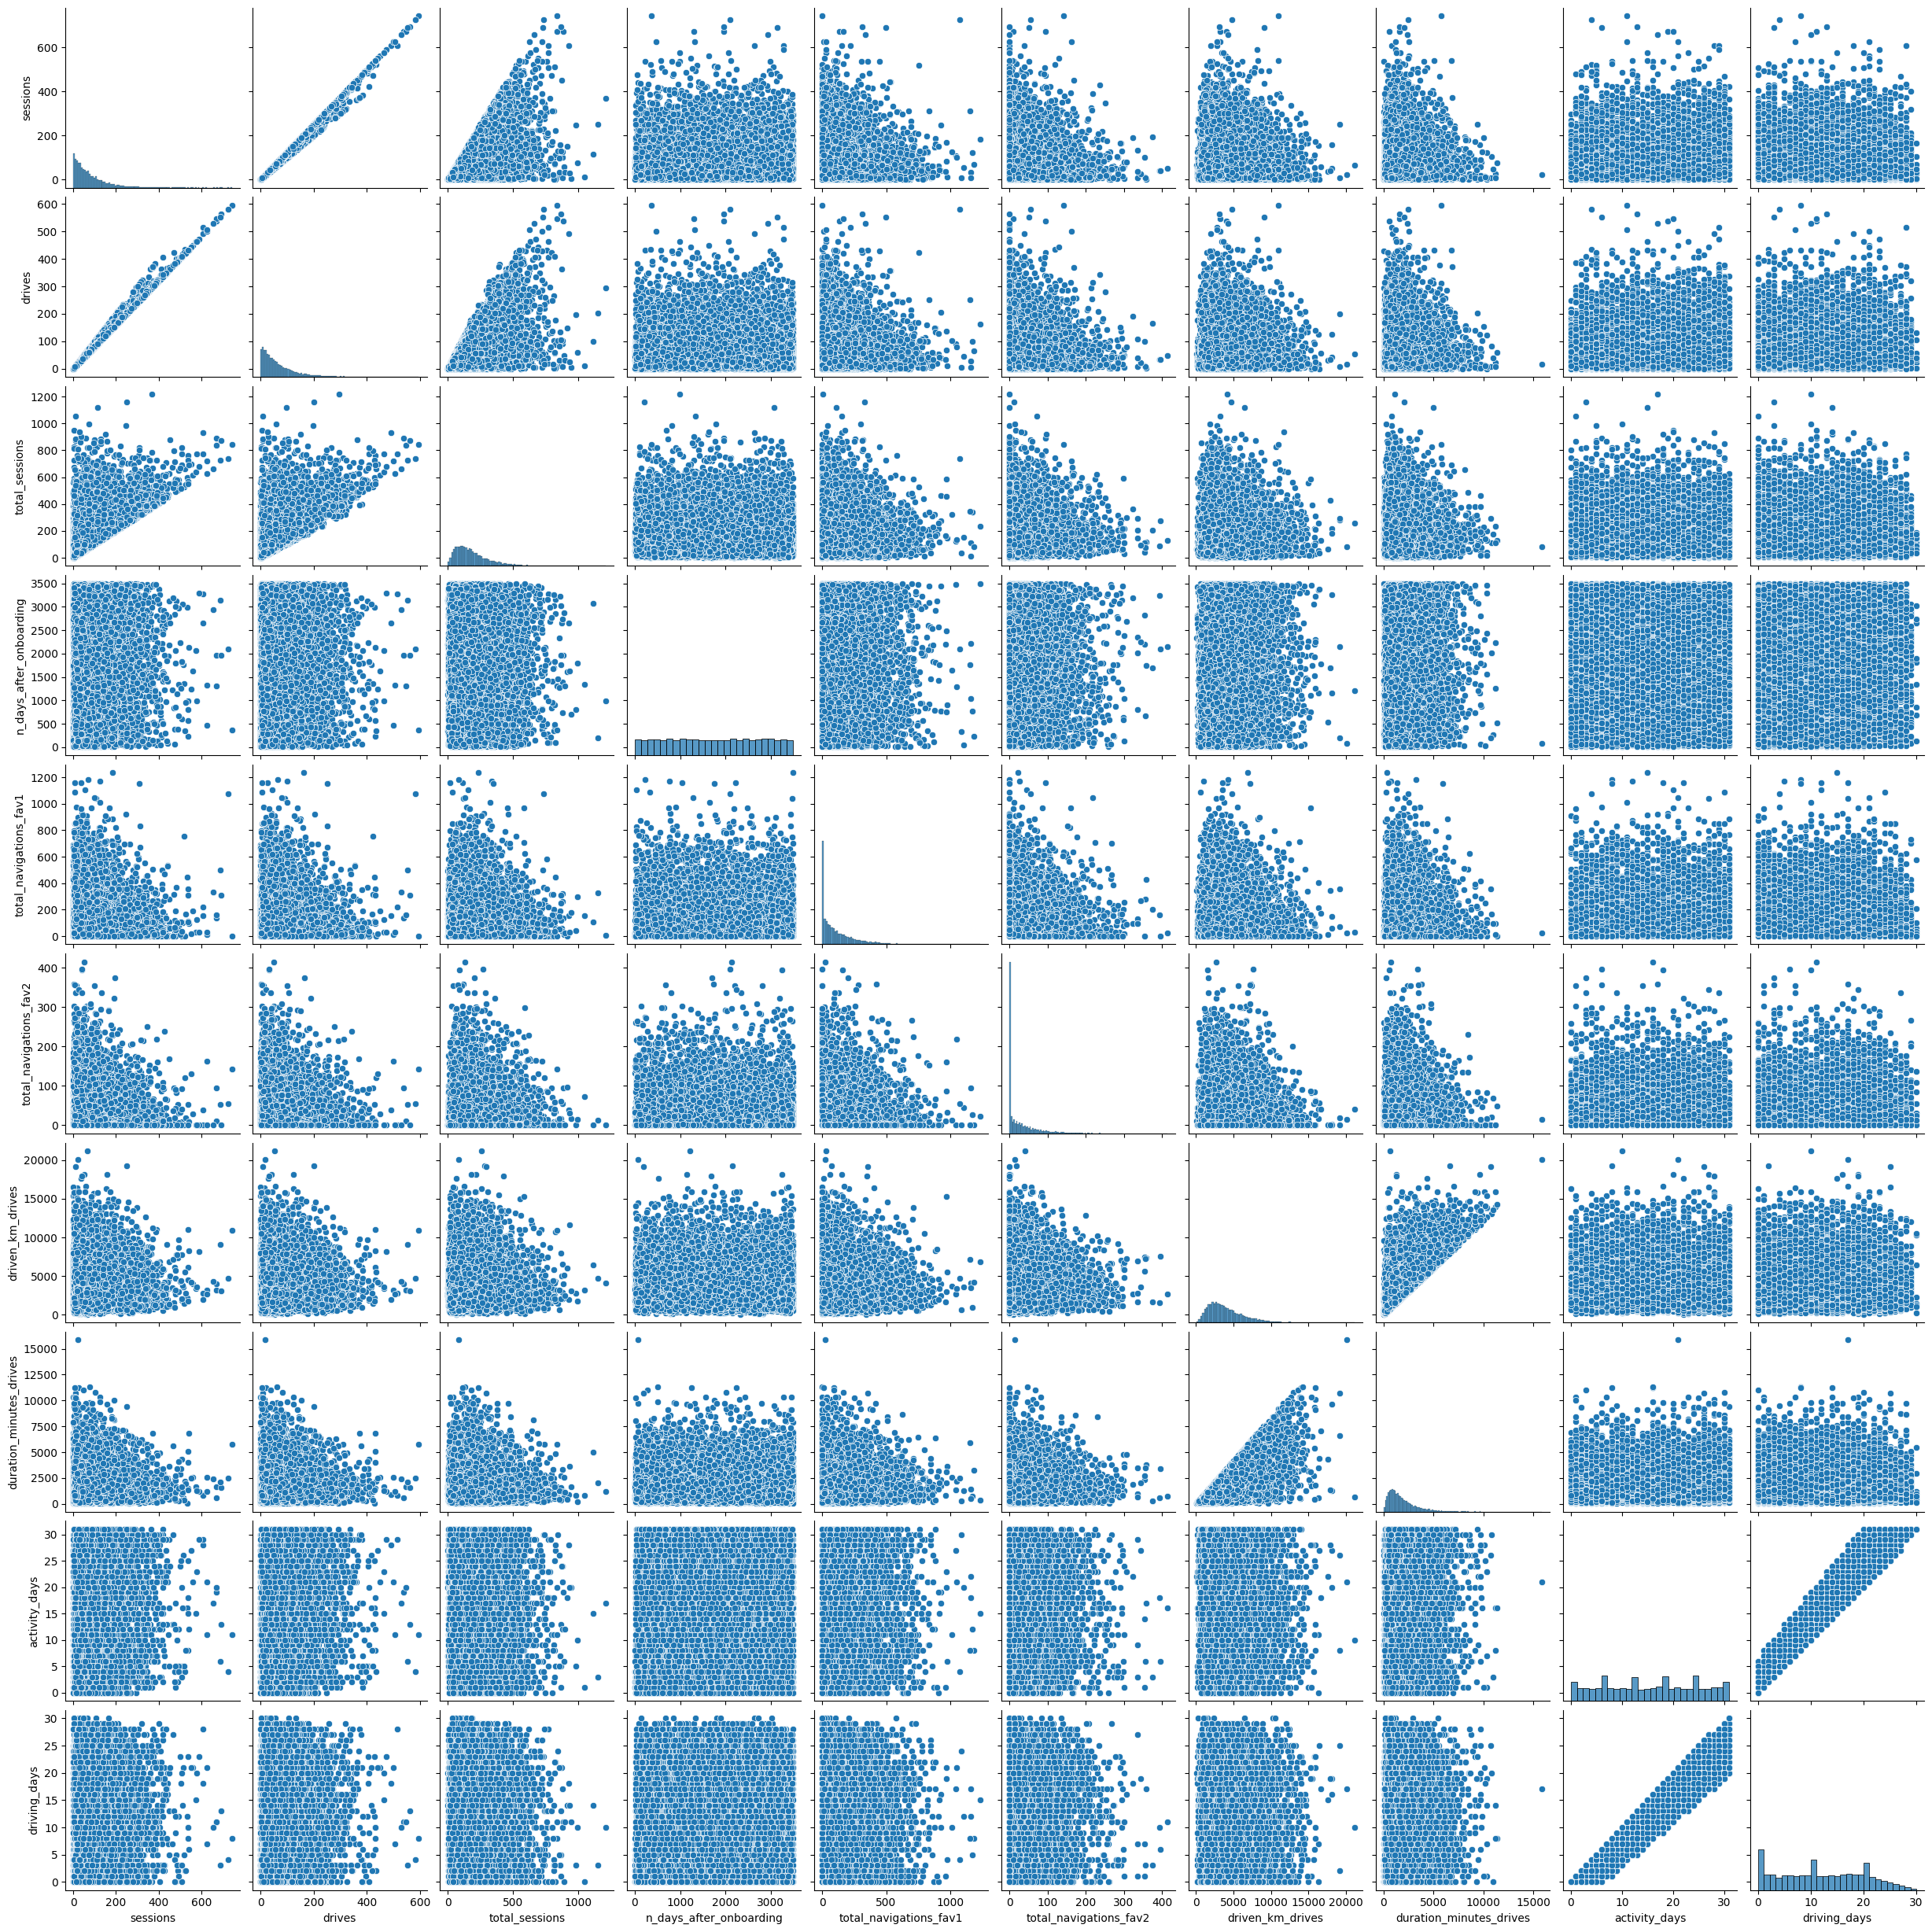

In [ ]:
sns.pairplot(x)
plt.show()

## Feature Reduction

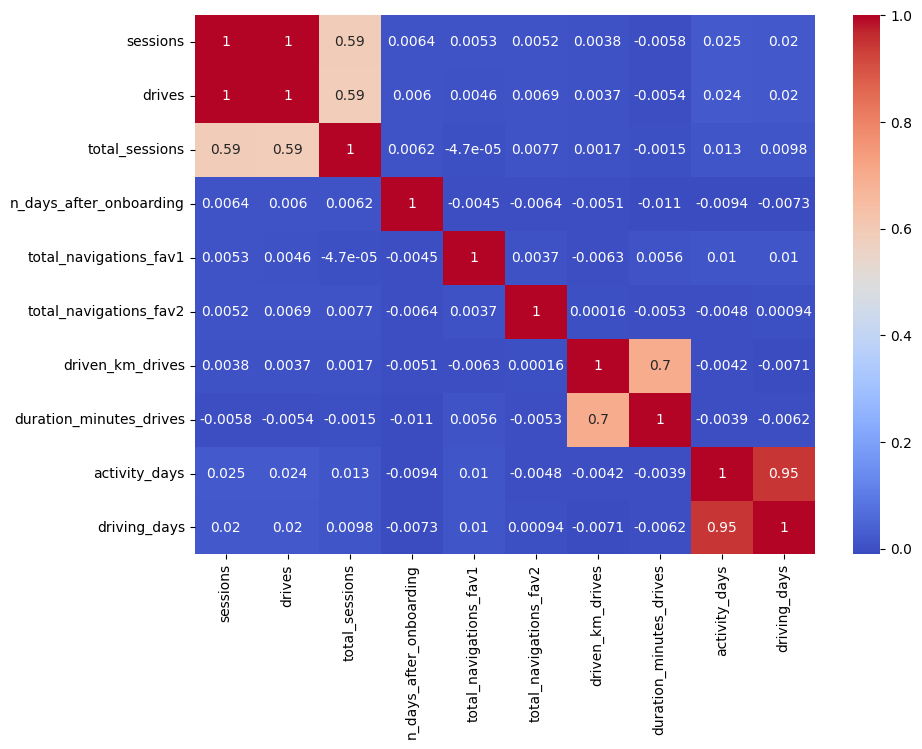

In [ ]:
# ploting correlation matrix
plt.figure(figsize=(10,7))
sns.heatmap(x.corr(),annot=True,cmap='coolwarm')
plt.show()

- we see strong correlation between drives and sessions
- also we have strong correlation between driving dayes and activity days

so we will drop drives and driving days

In [ ]:
# drop drives and driving days columns
x.drop(['drives','driving_days'],axis=1,inplace=True)

In [ ]:
x.shape

(14299, 8)

In [ ]:
y.describe()

count        14299
unique           2
top       retained
freq         11763
Name: label, dtype: object

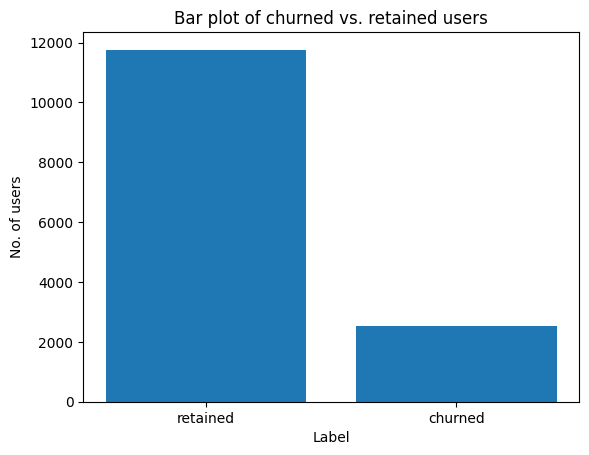

In [ ]:
plt.bar(y.value_counts().index,y.value_counts().values)
plt.title("Bar plot of churned vs. retained users")
plt.xlabel("Label")
plt.ylabel("No. of users")
plt.show()

### key observation:
- data imblanced

In [ ]:
# split x ,y into train and test
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(11439, 8)
(2860, 8)
(11439,)
(2860,)


## Handling imbalanced dataset
- we will do oversampling on the smallest calss on train dataset only
- not: do not oversample test data

In [ ]:
# oversampling churnd class
from imblearn.over_sampling import SMOTE

# Define the SMOTE object
smote = SMOTE()

# Fit and resample the dataset on train
X_resampled_tr, y_resampled_tr = smote.fit_resample(X_train, y_train)

In [ ]:
print(f'shape of x before oversampling : {X_train.shape}, y is {y_train.shape}')
print(f'shape of x after oversampling : {X_resampled_tr.shape}, y is {y_resampled_tr.shape}')

shape of x before oversampling : (11439, 8), y is (11439,)
shape of x after oversampling : (18852, 8), y is (18852,)


In [ ]:
print(f"before oversampling:\n {y_train.value_counts()}")
print(f"after oversampling:\n {y_resampled_tr.value_counts()}")

before oversampling:
 label
retained    9426
churned     2013
Name: count, dtype: int64
after oversampling:
 label
retained    9426
churned     9426
Name: count, dtype: int64


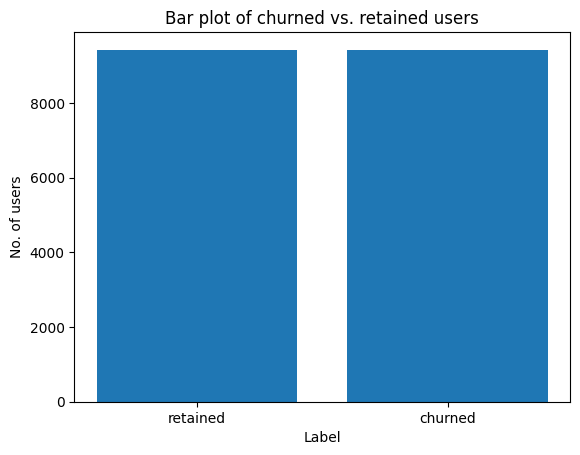

In [ ]:
plt.bar(y_resampled_tr.value_counts().index,y_resampled_tr.value_counts().values)
plt.title("Bar plot of churned vs. retained users")
plt.xlabel("Label")
plt.ylabel("No. of users")
plt.show()

In [ ]:
# normalize features using standard scaler
scaler = StandardScaler()
X_train_scal = scaler.fit_transform(X_resampled_tr)
X_test_scal = scaler.transform(X_test)

In [ ]:
# mapping target labele
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_resampled_tr)
y_test = label_encoder.transform(y_test)

In [ ]:
np.unique(y_test)

array([0, 1])

In [ ]:
np.unique(y_train)

array([0, 1])

## M1: build the logistic regression model

In [ ]:
log_model = LogisticRegression(penalty=None,max_iter=400)
log_model.fit(X_train_scal,y_train)

LogisticRegression(max_iter=400, penalty=None)

Classification report On train : 
               precision    recall  f1-score   support

           0       0.69      0.74      0.72      9426
           1       0.72      0.67      0.70      9426

    accuracy                           0.71     18852
   macro avg       0.71      0.71      0.71     18852
weighted avg       0.71      0.71      0.71     18852

Classification report On test : 
               precision    recall  f1-score   support

           0       0.33      0.72      0.45       523
           1       0.91      0.67      0.77      2337

    accuracy                           0.68      2860
   macro avg       0.62      0.69      0.61      2860
weighted avg       0.81      0.68      0.71      2860



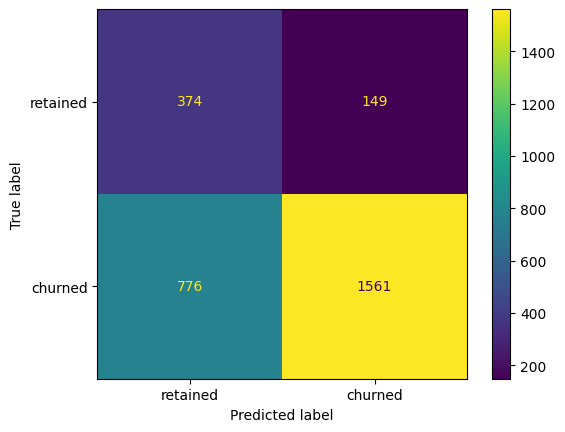

In [ ]:
y_predict_train = log_model.predict(X_train_scal)
y_predict_test = log_model.predict(X_test_scal)

print('Classification report On train : \n',classification_report(y_train,y_predict_train))
print('Classification report On test : \n',classification_report(y_test,y_predict_test))

cm=confusion_matrix(y_test,y_predict_test)
print(ConfusionMatrixDisplay(cm,display_labels=['retained','churned']).plot())



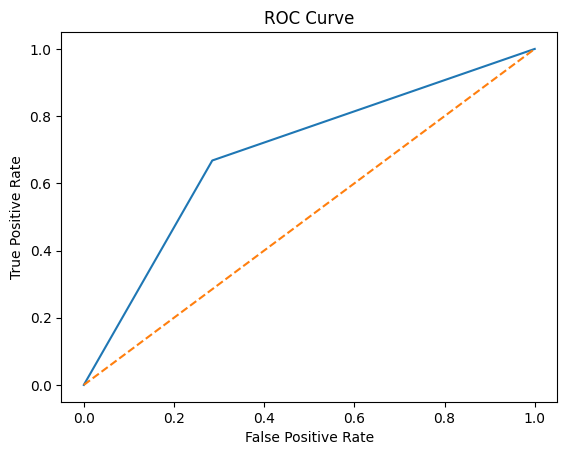

roc_auc : 0.691527763119032


In [ ]:
# plot roc curv
fpr, tpr, thresholds =roc_curve(y_test, y_predict_test)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print(f'roc_auc : {roc_auc}')


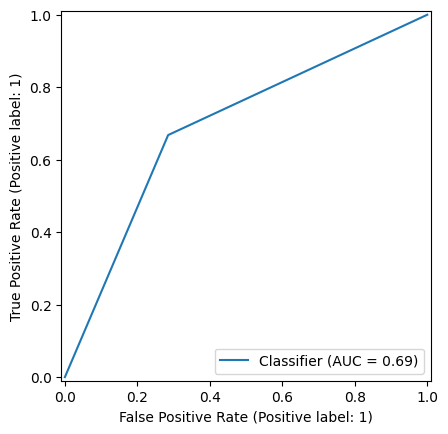

In [ ]:
RocCurveDisplay.from_predictions(y_test,y_predict_test)

## M2: Naive Bayes Model

Classification report On train : 
               precision    recall  f1-score   support

           0       0.69      0.79      0.74      9426
           1       0.75      0.64      0.69      9426

    accuracy                           0.72     18852
   macro avg       0.72      0.72      0.72     18852
weighted avg       0.72      0.72      0.72     18852

Classification report On test : 
               precision    recall  f1-score   support

           0       0.30      0.69      0.42       523
           1       0.90      0.64      0.75      2337

    accuracy                           0.65      2860
   macro avg       0.60      0.67      0.58      2860
weighted avg       0.79      0.65      0.69      2860



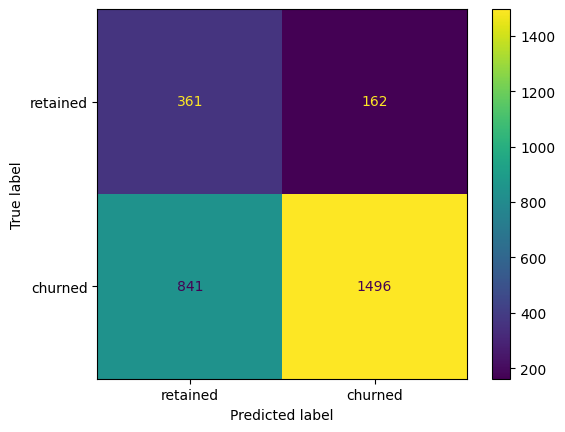

In [ ]:
Gnb = GaussianNB()
Gnb.fit(X_train_scal,y_train)
y_predict_train = Gnb.predict(X_train_scal)
y_predict_test = Gnb.predict(X_test_scal)

print('Classification report On train : \n',classification_report(y_train,y_predict_train))
print('Classification report On test : \n',classification_report(y_test,y_predict_test))

cm=confusion_matrix(y_test,y_predict_test)
print(ConfusionMatrixDisplay(cm,display_labels=['retained','churned']).plot())

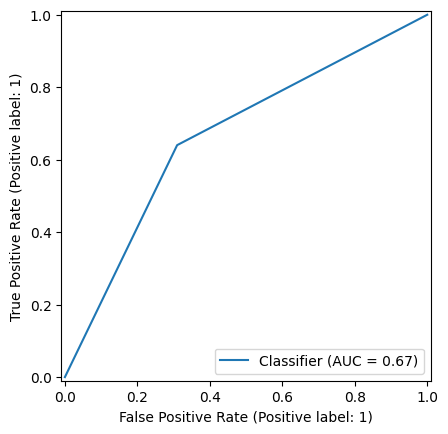

In [ ]:
RocCurveDisplay.from_predictions(y_test,y_predict_test)

# M3: Random Forest Tree-Based Model
Performed a GridSearch to turn hypterparameters

In [ ]:
from ctypes import c_void_p
rf = RandomForestClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [None],
             'max_features': [1.0],
             'max_samples': [1.0],
             'min_samples_leaf': [2],
             'min_samples_split': [2],
             'n_estimators': [300],
             }

#  3. Define a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

rf_cv =GridSearchCV(rf,cv_params,scoring=scoring,cv=5,refit='f1')

rf_cv.fit(X_train_scal,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [1.0], 'min_samples_leaf': [2],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

Classification report On train : 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      9426
           1       0.99      1.00      1.00      9426

    accuracy                           1.00     18852
   macro avg       1.00      1.00      1.00     18852
weighted avg       1.00      1.00      1.00     18852

Classification report On test : 
               precision    recall  f1-score   support

           0       0.32      0.44      0.37       523
           1       0.86      0.79      0.82      2337

    accuracy                           0.72      2860
   macro avg       0.59      0.61      0.60      2860
weighted avg       0.76      0.72      0.74      2860



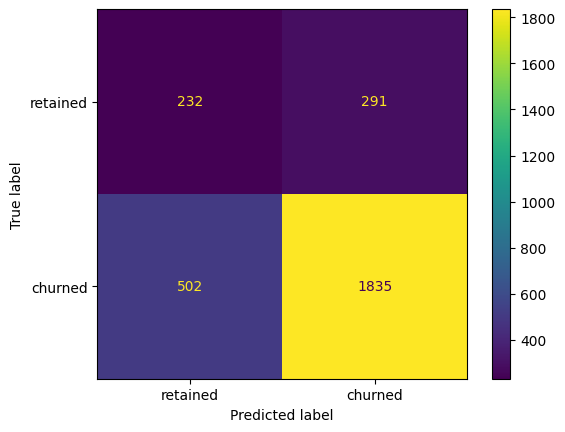

In [ ]:
y_predict_train = rf_cv.predict(X_train_scal)
y_predict_test =rf_cv.predict(X_test_scal)

print('Classification report On train : \n',classification_report(y_train,y_predict_train))
print('Classification report On test : \n',classification_report(y_test,y_predict_test))

cm=confusion_matrix(y_test,y_predict_test)
print(ConfusionMatrixDisplay(cm,display_labels=['retained','churned']).plot())

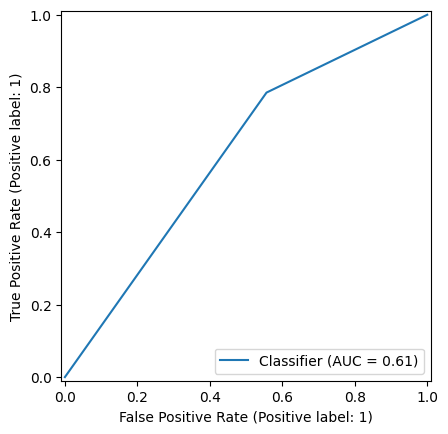

In [ ]:
RocCurveDisplay.from_predictions(y_test,y_predict_test)

# M4: XGBoost Tree-Based Model
Performed a GridSearch to turn hypterparameters

In [ ]:
# binary:logistic:
# This setting is used for binary classification tasks, where the goal is to classify instances into one of two classes (0 or 1, for example)
# When objective='binary:logistic' is specified, XGBoost uses the logistic regression loss function (log loss or binary cross-entropy) for optimization.

xgb = XGBClassifier(random_state=42,objective='binary:logistic')

# 2. Create a dictionary of hyperparameters to tune
xgb_pramters={
    'n_estimators':[300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3, 5],
}

#  3. Define a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

xgb_cv =GridSearchCV(xgb,xgb_pramters,scoring=scoring,cv=5,refit='f1')

xgb_cv.fit(X_train_scal,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [300], 'subsample': [0.8, 1.0]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

Classification report On train : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      9426
           1       0.98      0.96      0.97      9426

    accuracy                           0.97     18852
   macro avg       0.97      0.97      0.97     18852
weighted avg       0.97      0.97      0.97     18852

Classification report On test : 
               precision    recall  f1-score   support

           0       0.35      0.42      0.38       523
           1       0.86      0.82      0.84      2337

    accuracy                           0.75      2860
   macro avg       0.61      0.62      0.61      2860
weighted avg       0.77      0.75      0.76      2860



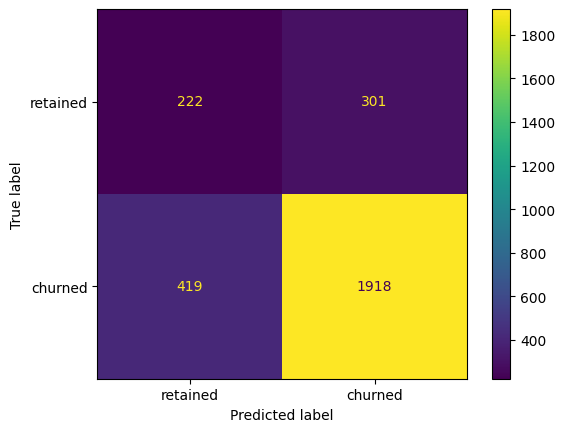

In [ ]:
y_predict_train = xgb_cv.predict(X_train_scal)
y_predict_test =xgb_cv.predict(X_test_scal)

print('Classification report On train : \n',classification_report(y_train,y_predict_train))
print('Classification report On test : \n',classification_report(y_test,y_predict_test))

cm=confusion_matrix(y_test,y_predict_test)
print(ConfusionMatrixDisplay(cm,display_labels=['retained','churned']).plot())

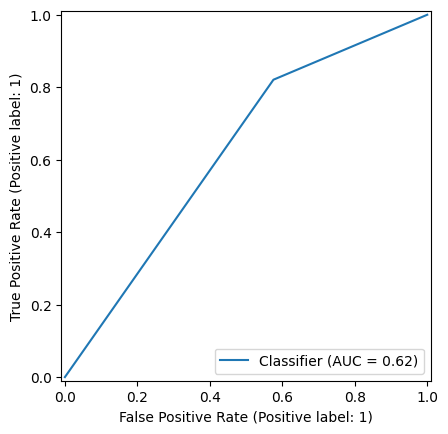

In [ ]:
RocCurveDisplay.from_predictions(y_test,y_predict_test)